In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_column', None)
pd.set_option('display.width', 500)

In [2]:
df=pd.read_csv('car.csv')

In [3]:
df.head()

,Bying,maintenance,doors,persons,Luggage boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bying         1728 non-null   object
 1   maintenance   1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   Luggage boot  1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.isnull().sum()

Bying           0
maintenance     0
doors           0
persons         0
Luggage boot    0
safety          0
class           0
dtype: int64

In [6]:
df.describe().T

,count,unique,top,freq
Bying,1728,4,vhigh,432
maintenance,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
Luggage boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


In [7]:
all_columns = df.columns
all_columns

Index(['Bying', 'maintenance', 'doors', 'persons', 'Luggage boot', 'safety', 'class'], dtype='object')

In [8]:
def count_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts()}))
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, hue=df['class'])
        plt.show(block=True)

       Bying
vhigh    432
high     432
med      432
low      432


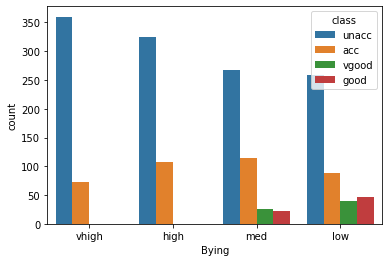

       maintenance
vhigh          432
high           432
med            432
low            432


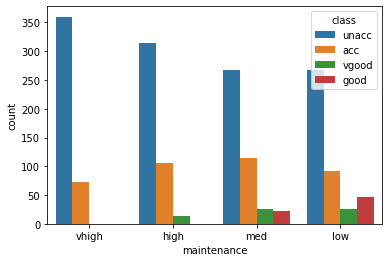

       doors
2        432
3        432
4        432
5more    432


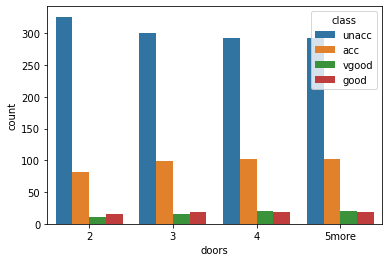

      persons
2         576
4         576
more      576


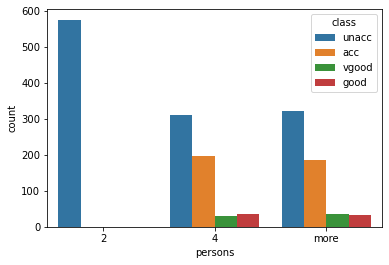

       Luggage boot
small           576
med             576
big             576


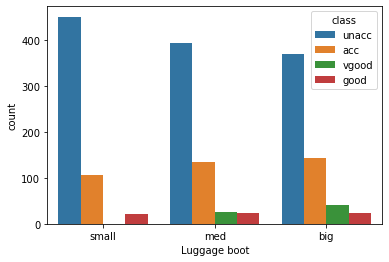

      safety
low      576
med      576
high     576


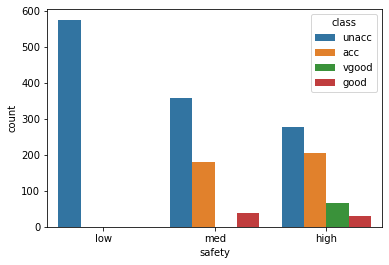

       class
unacc   1210
acc      384
good      69
vgood     65


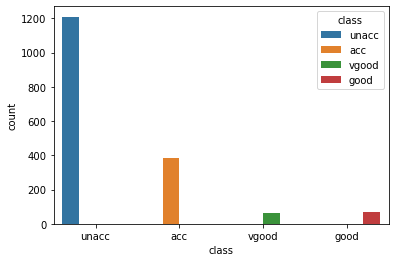

In [9]:
for col in all_columns:
    count_summary(df, col, plot=True)

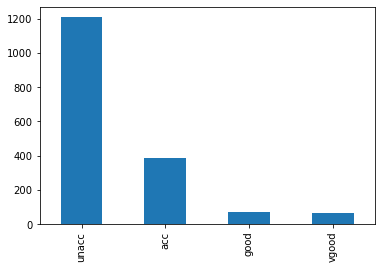

In [10]:
df['class'].value_counts().plot(kind = 'bar')
plt.show()

In [11]:
person = df['persons'].unique()
person

array(['2', '4', 'more'], dtype=object)

In [12]:
doors = df['doors'].unique()
doors

array(['2', '3', '4', '5more'], dtype=object)

In [13]:
def label_encod(dataframe, col_name):
    le=preprocessing.LabelEncoder()
    dataframe[col_name]=le.fit_transform(dataframe[col_name])

In [14]:
for col in all_columns:
    label_encod(df, col)

In [15]:
df.head()

,Bying,maintenance,doors,persons,Luggage boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

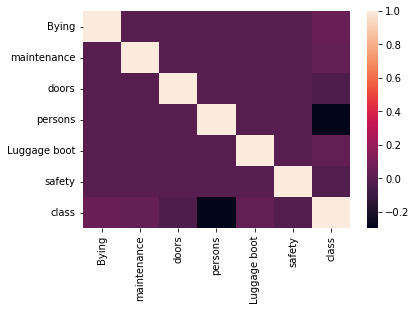

In [16]:
sns.heatmap(df.corr())

In [17]:
X=df.drop(['class'], axis=1)
y=df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [19]:
rf_model=RandomForestClassifier()

In [20]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf_model.predict(X_test)

In [22]:
y_pred = pd.DataFrame(rf_model.predict(X_test))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred, average = 'macro'))
print("Recall score:", recall_score(y_test, y_pred, average = 'macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.9797687861271677
Precision score: 0.9523596800643584
Recall score: 0.9488920170738353
F1 score: 0.9499786627136536


In [23]:
scores = cross_val_score(rf_model, X_train, y_train, cv=10)
scores
#print('Cross_val_score', 'is', scores)
#print('Mean cross_val_score', 'is', scores.mean())

array([0.97841727, 0.96402878, 0.97101449, 0.94927536, 0.96376812,
       0.98550725, 0.99275362, 0.97101449, 0.99275362, 0.97826087])

In [24]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
rf_params={"max_depth":[5,15,None],
          "min_samples_split":[2,4,6],
          "n_estimators":[10,100,500]}

rf_best_grid=GridSearchCV(rf_model,rf_params, cv=5, n_jobs=1, verbose=0).fit(X_train,y_train)

rf_best_grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [26]:
rf_final=rf_model.set_params(**rf_best_grid.best_params_).fit(X_train,y_train)

In [27]:
y_pred = pd.DataFrame(rf_model.predict(X_test))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred, average = 'macro'))
print("Recall score:", recall_score(y_test, y_pred, average = 'macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.9855491329479769
Precision score: 0.9546703296703297
Recall score: 0.9553855235673419
F1 score: 0.9543808484902454
